In [66]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from time import perf_counter 
import os
import cv2
from tensorflow.keras.models import Sequential
from keras.utils.vis_utils import plot_model
from PIL import Image

In [67]:
train_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    'train',
    seed=40,
    color_mode = 'grayscale'
    )

#OR

# training = tf.keras.utils.image_dataset_from_directory(
#     'train',
#     color_mode = 'grayscale'
#     )

Found 2000 files belonging to 1 classes.


In [288]:
# plt.figure(figsize=(8, 8))
# for images, labels in train_ds.take(1):
#   for i in range(6):
#     ax = plt.subplot(3, 3, i+1)
#     plt.imshow(images[i].numpy().astype("uint8"), cmap = 'gray')
#     #plt.title(class_names[labels[i]])
#     plt.axis("off")

In [70]:
# gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# # gray = cv2.imread('D:/Y/0.png', 0)
# # cv2.imwrite('gray.png', gray)
# plt.imshow(gray,cmap='gray')

# img = cv2.imread('D:/Y/0.png', 0)
# hh, ww = img.shape[:2]
# print(hh, ww)
# img.shape

In [276]:
image = cv2.imread('D:/Y/1.png', 0)
#ret,thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

bg=image[0,0]
bg1=image[149,0]
print(bg, bg1)

225 225


In [329]:
img = cv2.imread('D:/Y/1.png', 0)
ret,thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
kernel = np.ones((4,3),np.uint8)
erosion = cv2.erode(thresh,kernel,iterations = 1)
cv2.imwrite('thin.png', erosion)
img=255-erosion
cv2.imwrite('final.png', img)

True

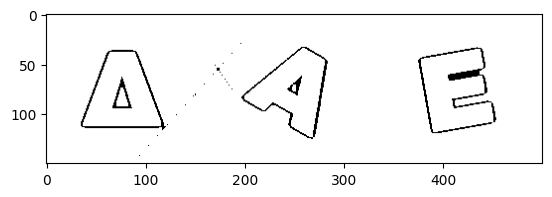

In [330]:
plt.imshow(img, cmap = 'gray')

In [325]:
bg=img[0,0]
arr =[]
for i in range(500):
    x = np.sum((img[:,i]==bg))
    
    if x < 145:
        

150

In [299]:
image = cv2.imread('D:/Y/1.png', 0)
ret, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
img 
for i in range()



In [270]:
# image = cv2.imread('D:/Y/0.png', 0)

# ret,thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
# #print(thresh[1,0])

# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,1)bg)
# morph_img = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# # # Remove horizontal
# horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,1))
# detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=100)
# cnts = cv2.findContours(morph_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# for c in cnts:
#     erosion = cv2.erode(image,kernel,iterations = 1)
#     cv2.drawContours(image, [c], -1, (225,225), 1)

# # Repair image
# repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,1))
# result = 255 - cv2.morphologyEx(255 - image, cv2.MORPH_CLOSE, repair_kernel, iterations=1)

# cv2.imwrite('thresh.png', thresh)
# cv2.imwrite('detected_lines.png', detected_lines)
# cv2.imwrite('image.png', image)
# cv2.imwrite('result.png', result)

In [286]:
# def get_center_of_mass(img):
#         Y,X = ndimage.measurements.center_of_mass(img)
#         x,y = img.shape
#         delta_x = np.round(y/2.0-X).astype(int)
#         delta_y = np.round(x/2.0-Y).astype(int)
#         return delta_x, delta_y
    
# def get_to_center(image ,x, y):

#         (rows , cols) = image.shape
#         M = np.float32([[1,0,x],[0,1,y]])
#         centered = cv2.warpAffine(image,M,(cols,rows))
#         return centered 
    
# def preprocessing(img):
        
#         #cimg=255-np.array(img).astype(np.uint8)
#         #cimg = cv2.cvtColor(cimg, cv2.COLOR_BGR2GRAY)
#         #(T, cimg) = cv2.threshold(cimg, 127, 255,
# 	#cv2.THRESH_BINARY_INV )
        
#         image = cv2.resize(img, (150,150))
#         gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#         (T, threshInv) = cv2.threshold(gray.copy(), 127, 255,
#             cv2.THRESH_BINARY_INV )

#         kernel2 = np.full([3, 3], 10000, dtype=np.int32)
#         kernel_2 = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
#         cimg = cv2.erode(threshInv, kernel_2, iterations= 1)
#         #cimg = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
#            # cv.THRESH_BINARY,3,1)

#         #cimg = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
#            # cv.THRESH_BINARY,11,2)
    
#         while np.sum(cimg[0]) == 0:  #making squared image with respective pixels
#             cimg = cimg[1:]

#         while np.sum(cimg[0,:]) == 0:
#             cimg = cimg[:,1:]

#         while np.sum(cimg[-1]) == 0:
#             cimg = cimg[:-1]

#         while np.sum(cimg[:, -1])==0:
#             cimg = cimg[:,:-1]
            
#         rows,cols = cimg.shape
        
#         if rows == cols:
#             nrows = 130
#             ncols = 130
#             cimg = cv2.resize(cimg, (ncols,nrows))
           

#         if rows > cols:
#             nrows = 130
#             ncols = int(round((cols*130.0/rows), 0))
#             cimg = cv2.resize(cimg, (ncols,nrows))
            
#         else:
#             ncols = 130
#             nrows = int(round((rows*130.0/cols), 0))
            
#             cimg = cv2.resize(cimg, (ncols,nrows))
            
                             
    
#         col_pad = (int(math.ceil((150-ncols)/2.0)), int(math.floor((150-ncols)/2.0)))

#         row_pad = (int(math.ceil((150-nrows)/2.0)), int(math.floor((150-nrows)/2.0)))
#         cimg = np.lib.pad(cimg,(row_pad,col_pad),'constant')
#         del_x, del_y = get_center_of_mass(cimg) 
#         centered = get_to_center(cimg ,del_x, del_y)
         
#         ximg = centered.reshape(1,150,150).astype(np.float32)
#         ximg-= int(33.3952)
#         ximg/= int(78.6662)
#         return ximg        

In [287]:
# img = cv2.imread('D:/Y/1.png', 0)
# fimage = preprocessing(img)